# Análisis Exploratorio de Datos

En este notebook vamos a centrarnos en la exploración de las distintas variables que tenemos para predecir nuestra variable objetivo (Frio KW) y en el análisis de esta última. Todo esto con el fin de intentar detectar de forma temprana las posibles características que tengan mayor influencia en la predicción.

## 1. Exploración superficial de los crudos (.xlsx)

En este primer pantallazo no resulta interesante conocer un poco sobre qué información presenta cada hoja del archivo.

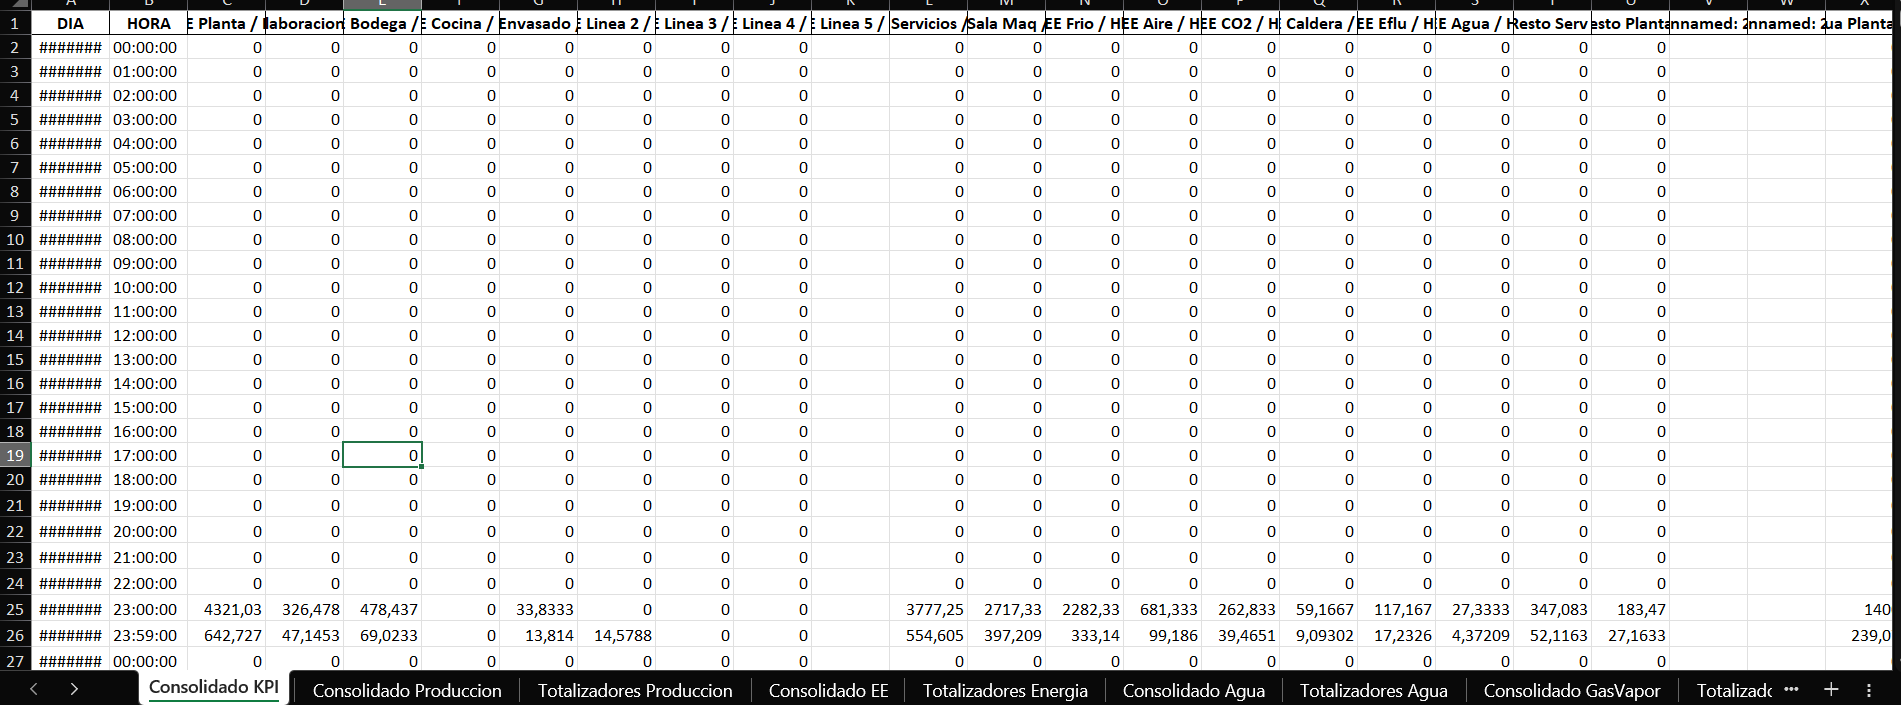

Mirando los nombres de las distintas hojas nos dimos cuenta que varias de ellas poseen 2 versiones:

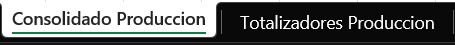

Lo que disparó la pregunta **¿Qué diferencia hay entre Consolidado y Totalizadores?**

Investigando un poco llegamos a la conclusión de que las hojas **Consolidado** son una especie de resumen filtrado y menos detallado de **Totalizadores**, esto normalmente se usa en las empresas para que gerentes o empleados que no están trabajando particularmente en la planta puedan ver los datos sin tanto ruido visual.

Esto ya nos lelvó a tomar una decisión. Siempre que sea posible (o sea, que exista) vamos a **usar la versión de Consolidado**.

Luego nos surgieron las típicas preguntas de: *"¿Qué significa esto? ¿Y esto otro?"*

Así que acá va un breve detalle de lo que significan algunas de las hojas:

- **KPI:** Son metricas de eficiencia creadas a partir de variables presentes en otras hojas.
- **Glicol:** Es el fluido refrigerante utilizado por el sistema de refrigeración.
- **Efluentes:** Son las aguas residuales de la planta. El proceso cervecero genera muchos residuos líquidos que deben ser tratados antes de ser descargados.
- **CO2:** Dióxido de carbono. En una cervecera, es crucial.

Una vez conocido lo que contienen nuestros crudos, pasamos a la siguiente etapa de decisión.

### ¿Qué vamos a extraer y por qué?

Para esto analizamos que más sencillo mirar lo que **NO** queríamos y el por qué, así que la decisión final fue lo siguiente:

Vamos a quedarnos con **todos los Consolidados** (justificado más arriba), y vamos a descartar las siguientes variables:

1. **KPI:** Al estar constituida por información de otras hojas existe la posibilidad de estar usando el *target para predecir el target*, o sea, ¡DATA LEAKAGE!
2. **Efluentes:** La hoja Consolidado EE ya tiene Efluentes (Kw) (la energía usada para tratarlos) y al ser un predictor menos directo podría añadir "ruido".

Quedando nuestra *lista de extracción* de esta forma:
- Consolidado EE
- Consolidado Produccion
- Totalizadores Energia
- Consolidado Agua
- Consolidado GasVapor
- Consolidado Aire
- Totalizadores Glicol
- Totalizadores CO2

---

## 2. Análisis Descriptivo y Versionado Inicial de Datos

### Implementación de la extracción de características de los archivos .xlsx utilizando openpyxl

In [ ]:
# Seteo inicial

import sys
import logging
import warnings
from pathlib import Path

# Configuración de logging y advertencias
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
warnings.filterwarnings('ignore')


# Configuración de Paths
BASE_DIR = Path('../').resolve()
DATA_DIR = BASE_DIR / 'data'
SRC_DIR = BASE_DIR / 'src'
RAW_DIR = DATA_DIR / 'raw'
PROCESSED_DIR = DATA_DIR / 'processed'
sys.path.append(str(SRC_DIR))

PROCESSED_DIR.mkdir(exist_ok=True)

logging.info(f"Directorio Base: {BASE_DIR}")
logging.info(f"Directorio de Datos: {DATA_DIR}")
logging.info(f"Directorio Procesado: {PROCESSED_DIR}")
logging.info(f"Directorio Src: {SRC_DIR}")

2025-11-06 14:59:48,525 - Directorio Base: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF
2025-11-06 14:59:48,527 - Directorio de Datos: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF\data
2025-11-06 14:59:48,529 - Directorio Procesado: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF\data\processed
2025-11-06 14:59:48,529 - Directorio Src: C:\Users\vex_a\Documents\IA\3ro\2doCuatri\LabDatos\Practica\lab-datos-TPF\src


In [ ]:
# --- Importar nuestras funciones ---
from aux_functions import create_dataset_from_xlsx
    
# --- Listas de Archivos y Hojas ---

# 1. Definir los archivos Excel fuente (los originales .xlsx)
excel_files_list = [
    'TotalizadoresPlantaCerveza2020_2021.xlsx',
    'TotalizadoresPlantaCerveza2021_2022.xlsx',
    'TotalizadoresPlantaCerveza2022_2023.xlsx',
]

# 2. Definir todas las hojas que queremos procesar
hojas_a_procesar = [
    'Consolidado EE',        # Target Frio (Kw) y features de energía
    'Totalizadores Energia',   # Detalle de compresores KW Mycom 1-7
    'Consolidado Produccion',
    'Consolidado Agua',
    'Consolidado GasVapor',
    'Consolidado Aire',
    'Totalizadores Glicol',
    'Totalizadores CO2'
]

# 3. Definir el path de salida
OUTPUT_FILE = PROCESSED_DIR / 'dataset_v01.csv'

# --- Ejecutar la Ingesta ---
import pandas as pd
try:
    df_final = pd.read_csv(OUTPUT_FILE, parse_dates=['Fecha'], index_col='Fecha')
    logging.info(f"Archivo procesado ya existe en {OUTPUT_FILE}. Cargando archivo existente.")
except FileNotFoundError:
    logging.info(f"Archivo procesado no encontrado. Iniciando creación del dataset desde archivos Excel.")              
    # Llamamos a la función orquestadora
    df_final = create_dataset_from_xlsx(
        sheet_names=hojas_a_procesar,
        excel_files=excel_files_list,
        data_raw_dir=RAW_DIR,
        output_csv_path=OUTPUT_FILE
    )

2025-11-06 14:59:48,550 - --- Iniciando procesamiento para Hoja: 'Consolidado EE' ---
2025-11-06 14:59:48,552 - Leyendo: TotalizadoresPlantaCerveza2020_2021.xlsx...
2025-11-06 15:00:45,622 - Leyendo: TotalizadoresPlantaCerveza2021_2022.xlsx...
2025-11-06 15:01:49,685 - Leyendo: TotalizadoresPlantaCerveza2022_2023.xlsx...
2025-11-06 15:02:41,043 - Procesamiento para 'Consolidado EE' completado. 1190 días unificados.
2025-11-06 15:02:41,050 - --- Iniciando procesamiento para Hoja: 'Totalizadores Energia' ---
2025-11-06 15:02:41,052 - Leyendo: TotalizadoresPlantaCerveza2020_2021.xlsx...
2025-11-06 15:03:46,637 - Leyendo: TotalizadoresPlantaCerveza2021_2022.xlsx...
2025-11-06 15:04:48,549 - Leyendo: TotalizadoresPlantaCerveza2022_2023.xlsx...
2025-11-06 15:05:44,522 - Procesamiento para 'Totalizadores Energia' completado. 1190 días unificados.
2025-11-06 15:05:44,532 - --- Iniciando procesamiento para Hoja: 'Consolidado Produccion' ---
2025-11-06 15:05:44,533 - Leyendo: TotalizadoresPlanta

### Actualizar checksums

In [15]:
# --- Importar la nueva función de tracking ---
from aux_functions import track_data_artifact

# --- 4. Trazabilidad MLOps (Checksum y Lineage) ---
if not df_final.empty:
    print(f"\nIniciando versionado MLOps para {OUTPUT_FILE.name}...")
    
    # 1. Definir los paths de los archivos de versionado
    CHECKSUMS_FILE = DATA_DIR / 'checksums.json'
    DATA_LINEAGE_FILE = PROCESSED_DIR / 'data_lineage.json'

    # 2. Definir los archivos fuente (como Paths)
    source_files_paths = [RAW_DIR / f for f in excel_files_list]
    
    # 3. Definir parámetros a loggear
    lineage_params = {
        "sheets_used": hojas_a_procesar,
        "ingest_function": "create_dataset_from_xlsx",
        "description_regla_negocio": "Filtrado de último valor diario (totalizadores)."
    }
    
    # 4. Llamar a la nueva función de tracking
    try:
        track_data_artifact(
            output_file_path=OUTPUT_FILE,
            description="Dataset v0.1: Extracción cruda (último valor diario) de 8 hojas Excel.",
            source_files_list=source_files_paths,
            parameters=lineage_params,
            base_dir=BASE_DIR, # Clave para paths relativos
            checksums_file_path=CHECKSUMS_FILE,
            lineage_file_path=DATA_LINEAGE_FILE
        )
    except Exception as e:
        print(f"Error durante el tracking del artefacto: {e}")

2025-11-06 15:21:14,739 - --- Iniciando tracking de artefacto para: dataset_v01.csv ---
2025-11-06 15:21:14,768 - Checksum (SHA256): 9599c51653fedcf111ef11c4709062de741506d70a254ae01162ca60431b6f63
2025-11-06 15:21:14,771 - Checksum guardado en checksums.json
2025-11-06 15:21:14,778 - Data lineage actualizado en data_lineage.json
2025-11-06 15:21:14,780 - --- Tracking de artefacto completado ---



Iniciando versionado MLOps para dataset_v01.csv...


### Dimensiones del dataset completo

In [16]:
df_final.shape

(1190, 149)

### Tipos de variables y rangos de valores.

In [17]:
df_final.info()
print()
display(df_final.describe().T.round(2))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1190 entries, 2020-07-01 23:59:00 to 2023-10-26 07:00:00
Columns: 149 entries, Planta (Kw) to Totalizador_Filtracion
dtypes: float64(144), int64(4), object(1)
memory usage: 1.4+ MB



,count,mean,std,min,25%,50%,75%,max
Planta (Kw),1190.0,6.555813e+04,7.015841e+04,8987.48,51584.23,66827.92,76450.47,2.412967e+06
Elaboracion (Kw),1190.0,6.939790e+03,1.948200e+03,-672.00,5709.50,7122.50,8352.50,1.157500e+04
Bodega (Kw),1190.0,5.951030e+03,1.831250e+03,-6247.00,4847.62,6086.12,7192.12,1.691800e+04
Cocina (Kw),1190.0,1.717150e+03,6.993000e+02,76.00,1259.25,1965.00,2232.75,3.125000e+03
Envasado (Kw),1190.0,2.753613e+13,9.498969e+14,347.00,9765.25,16346.00,19045.75,3.276800e+16
...,...,...,...,...,...,...,...,...
Totalizador_L3,1189.0,1.237110e+03,1.429150e+03,0.00,81.00,1342.00,1691.00,1.267000e+04
Totaliador_Latas,1189.0,3.847570e+03,2.095390e+03,0.00,2670.00,4786.00,5324.00,6.663000e+03
Totalizador_Bodega,1189.0,3.450460e+03,1.815030e+03,0.00,2315.19,3481.50,4605.34,1.242181e+04
Totalizador_Tq_Pulmon,1189.0,1.101340e+04,2.416003e+04,-805849.00,8764.00,12645.00,15148.00,2.378700e+04


In [18]:
# Detallado de la variable objetivo (Frío)

display(df_final['Frio (Kw)'].describe().T)

count    1.190000e+03
mean     3.345313e+04
std      2.397688e+05
min      2.310000e+03
25%      1.794200e+04
50%      2.368650e+04
75%      2.932250e+04
max      6.155928e+06
Name: Frio (Kw), dtype: float64

### Identificación y cuantificación de valores faltantes.

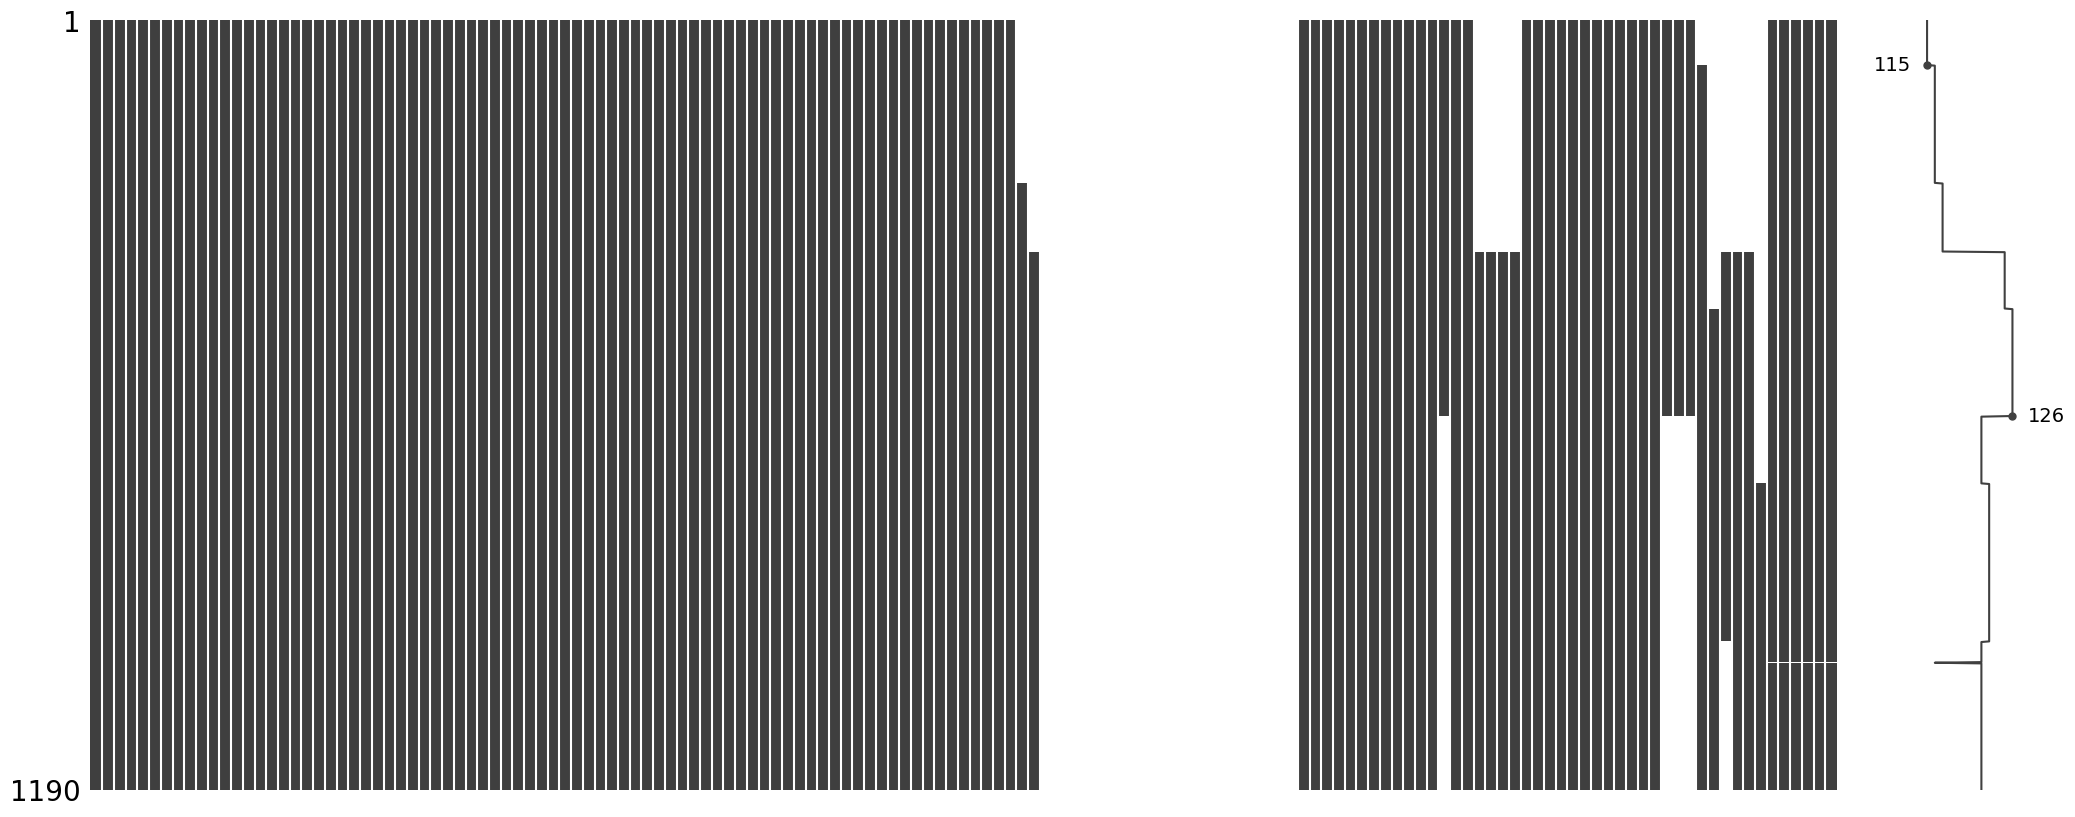

In [19]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_final)
plt.show()

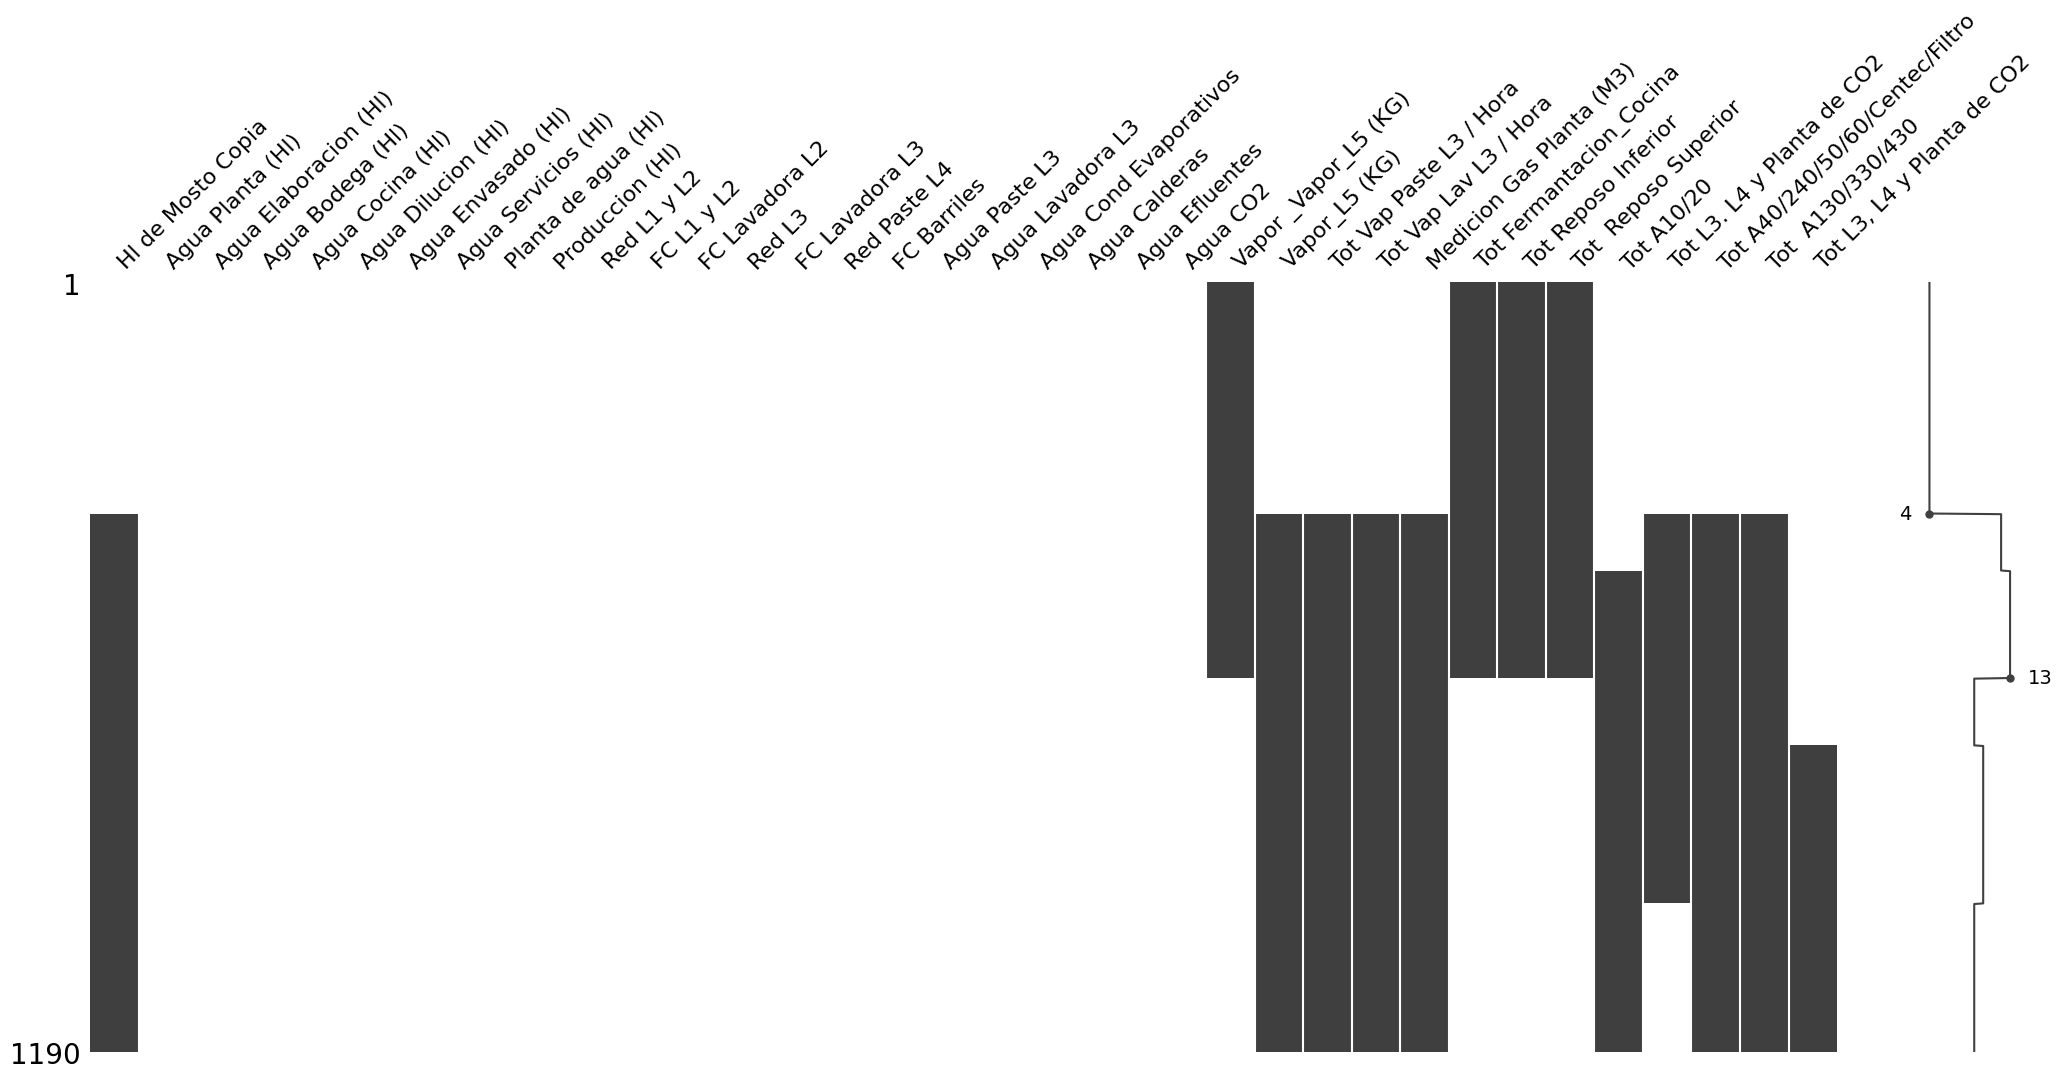

In [20]:
# Zoom a las variables con más del 30% de datos faltantes

msno.matrix(
    df_final.loc[:, df_final.isnull().mean() > 0.3]
)
plt.show()

### Detección de valores atípicos y errores (#VALUE!, #DIV/0!, etc.)

In [21]:
# Cuantificar cantidad de valores atípicos por columna usando el método del IQR

outliers_summary = {}
for column in df_final.select_dtypes(include=['number']).columns:
    Q1 = df_final[column].quantile(0.25)
    Q3 = df_final[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_final[(df_final[column] < lower_bound) | (df_final[column] > upper_bound)]
    outliers_summary[column] = {
        'num_outliers': outliers.shape[0],
        'percentage_outliers': (outliers.shape[0] / df_final.shape[0]) * 100
    }

outliers_df = pd.DataFrame(outliers_summary).T
outliers_df = outliers_df.sort_values(by='percentage_outliers', ascending=False)

display(outliers_df.round(2))

,num_outliers,percentage_outliers
Totalizador_L2_Barriles,282.0,23.70
VAPOR DE LINEA 4 KG,229.0,19.24
Totaliador_Aire_L4,222.0,18.66
KW Filtr Carbon,200.0,16.81
Linea 4 (Kw),188.0,15.80
...,...,...
Totalizador_Aire_L5,0.0,0.00
Tot A10/20,0.0,0.00
Tot Reposo Inferior,0.0,0.00
Totaliador_Latas,0.0,0.00


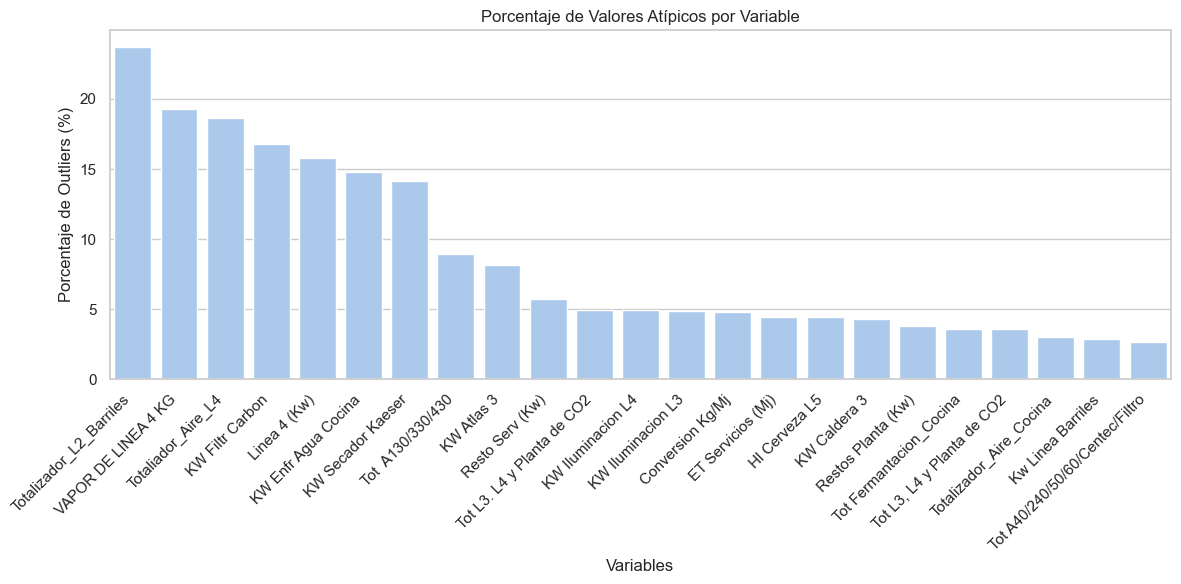

In [22]:
# Mostrar el resumen de outliers en un gráfico de barras

import seaborn as sns
sns.set_theme('notebook', 'whitegrid', palette='pastel')

plt.figure(figsize=(12, 6))
outliers_df = outliers_df[outliers_df['num_outliers'] > 30]     # Filtrar solo variables con más de 30 outliers
sns.barplot(x=outliers_df.index, y='percentage_outliers', data=outliers_df)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentaje de Valores Atípicos por Variable')
plt.ylabel('Porcentaje de Outliers (%)')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

---

## 3. Análisis de la variable objetivo

In [57]:
TARGET_COL = "Frio (Kw)"

### Distribución y valores extremos

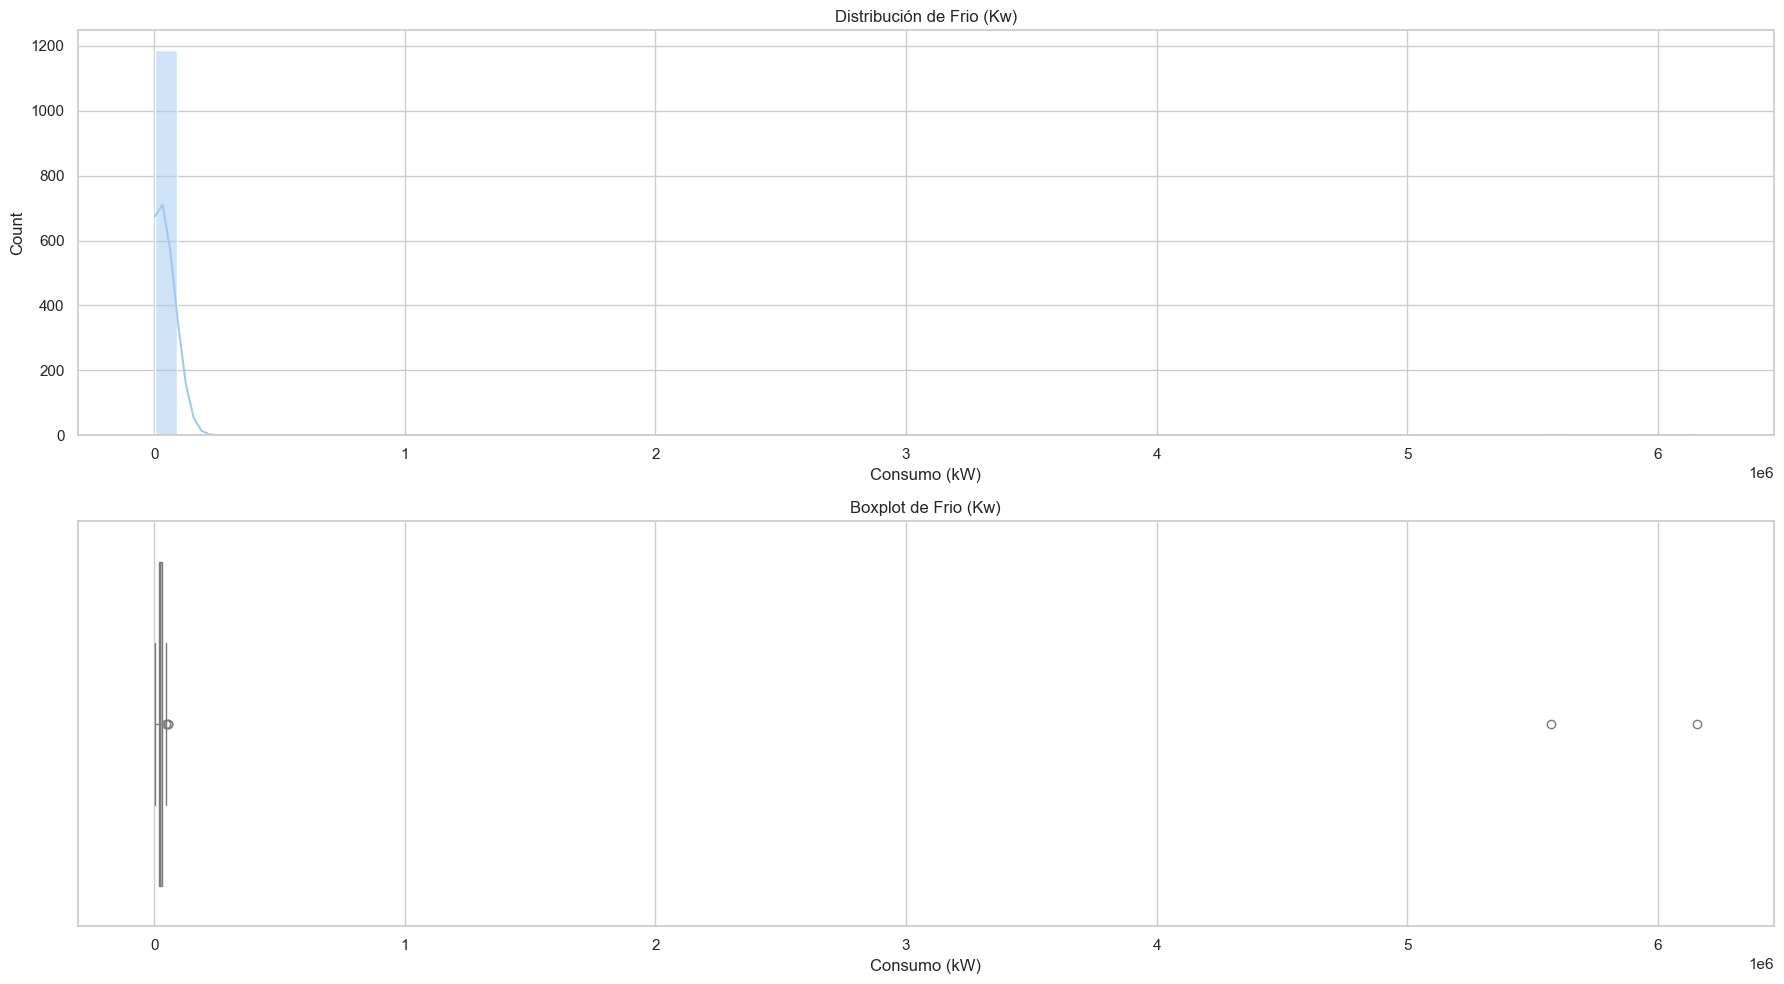

In [58]:
# --- Análisis de Distribución  ---

fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Histograma (para ver la forma de la distribución)
sns.histplot(x=df_final[TARGET_COL].dropna(), kde=True, ax=axes[0])
axes[0].set_title(f'Distribución de {TARGET_COL}')
axes[0].set_xlabel('Consumo (kW)')

# Boxplot (para ver outliers)
sns.boxplot(x=df_final[TARGET_COL].dropna(), ax=axes[1])
axes[1].set_title(f'Boxplot de {TARGET_COL}')
axes[1].set_xlabel('Consumo (kW)')

plt.tight_layout()
plt.show()

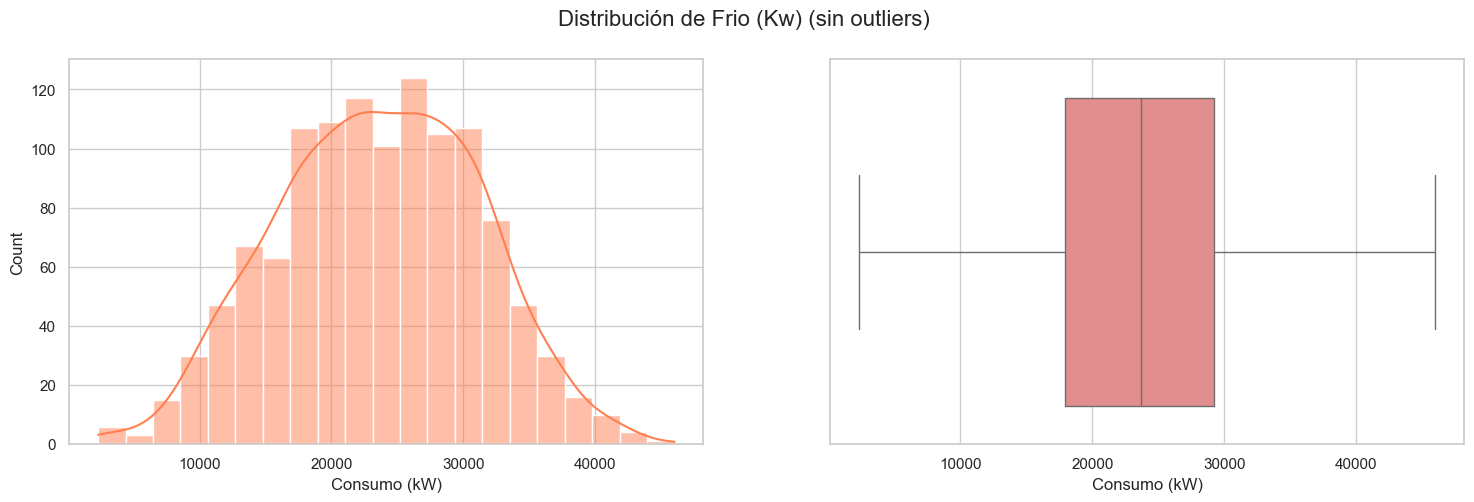

In [59]:
# Quitando los outliers para ver mejor la distribución central

df_eda_temp = df_final.copy()

Q1 = df_eda_temp[TARGET_COL].quantile(0.25)
Q3 = df_eda_temp[TARGET_COL].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df_eda_temp = df_eda_temp[(df_eda_temp[TARGET_COL] >= limite_inferior) & (df_eda_temp[TARGET_COL] <= limite_superior)]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

fig.suptitle(f'Distribución de {TARGET_COL} (sin outliers)', fontsize=16)

sns.histplot(x=df_eda_temp[TARGET_COL].dropna(), kde=True, color='coral', ax=axes[0])
axes[0].set_xlabel('Consumo (kW)')

sns.boxplot(x=df_eda_temp[TARGET_COL].dropna(), color='lightcoral', ax=axes[1])
axes[1].set_xlabel('Consumo (kW)')

plt.show()

### Verificación de Continuidad Temporal

In [60]:
# --- Detección de Días Faltantes o Irregulares ---

df_daily = df_final.copy()

# 1. Definir el rango de fechas completo que DEBERÍA existir
min_date = df_daily.index.min()
max_date = df_daily.index.max()
date_range = pd.date_range(start=min_date, end=max_date, freq='D')

print(f"Rango de fechas analizado: {min_date.date()} a {max_date.date()}")
print(f"Días esperados en el rango: {len(date_range)}")
print(f"Días reales en el dataset:   {len(df_daily)}")

# 2. Detectar los huecos (gaps)
# Aseguramos que ambos índices sean DatetimeIndex para evitar errores de tipos
missing_days = date_range.difference(pd.DatetimeIndex(df_daily.index))
n_missing = len(missing_days)

print()
if n_missing == 0:
    print("El dataset ya es continuo. No hay días faltantes.")
else:
    print(f"Se detectaron {n_missing} días faltantes.")

    missing_days = pd.DataFrame({'date': missing_days})
    missing_days['year'] = missing_days['date'].dt.year
    missing_days['month'] = missing_days['date'].dt.month
    missing_days['day'] = missing_days['date'].dt.day
    
    for year in missing_days['year'].unique():
        missing_in_year = missing_days[missing_days['year'] == year]
        print(f"\nAño {year}: {len(missing_in_year)} días faltantes")
        for month in missing_in_year['month'].unique():
            missing_in_month = missing_in_year[missing_in_year['month'] == month]
            days_list = missing_in_month['day'].tolist()
            print(f"  Mes {month:02d}: Días faltantes: {days_list}")

Rango de fechas analizado: 2020-07-01 a 2023-10-26
Días esperados en el rango: 1212
Días reales en el dataset:   1190

Se detectaron 42 días faltantes.

Año 2020: 10 días faltantes
  Mes 08: Días faltantes: [12, 25, 29, 30, 31]
  Mes 10: Días faltantes: [8, 22, 31]
  Mes 12: Días faltantes: [30, 31]

Año 2021: 11 días faltantes
  Mes 03: Días faltantes: [31]
  Mes 04: Días faltantes: [11]
  Mes 05: Días faltantes: [31]
  Mes 06: Días faltantes: [30]
  Mes 07: Días faltantes: [13]
  Mes 08: Días faltantes: [25, 29, 30, 31]
  Mes 10: Días faltantes: [31]
  Mes 12: Días faltantes: [31]

Año 2022: 12 días faltantes
  Mes 03: Días faltantes: [2, 31]
  Mes 04: Días faltantes: [5, 29]
  Mes 05: Días faltantes: [31]
  Mes 06: Días faltantes: [30]
  Mes 08: Días faltantes: [29, 30, 31]
  Mes 10: Días faltantes: [31]
  Mes 12: Días faltantes: [8, 31]

Año 2023: 9 días faltantes
  Mes 02: Días faltantes: [23]
  Mes 03: Días faltantes: [31]
  Mes 04: Días faltantes: [13, 19]
  Mes 05: Días faltant

#### Hallazgos Clave: Datos Faltantes No Aleatorios (MNAR)

Del análisis de continuidad temporal, se extraen dos conclusiones clave que definirán el preprocesamiento:

1.  **Datos Faltantes (MNAR) en Agosto:** Se detectó un patrón consistente: los días **29, 30 y 31 de Agosto** faltan en *todos* los años del dataset.
    * **Hipótesis:** Se trata de datos Faltantes No Aleatorios (MNAR).
    * **Regla de Negocio:** Luego de consultar, creemos que esto representa un **cierre de planta programado** (mantenimiento anual).
    * **Acción (Fase 2):** En la fase de preprocesamiento, estos días específicos **no se imputarán** aleatoriamente. Se les asignará explícitamente un consumo de **`0`**, ya que la planta (y por ende la refrigeración) estaba detenida.

2.  **Gaps (Días "31" y Faltantes Varios):** Los 42 días faltantes restantes (incluyendo los días "31" de meses con 30 días) se consideran Faltantes Aleatorios (MAR) o Completamente Aleatorios (MCAR).
    * **Acción:** Se tratarán unificadamente (re-indexando y convirtiéndolos a `NaN`) para ser imputados usando una técnica multivariada como `KNNImputer`.

### Evolución del consumo de Frio (kW) a lo largo del tiempo.

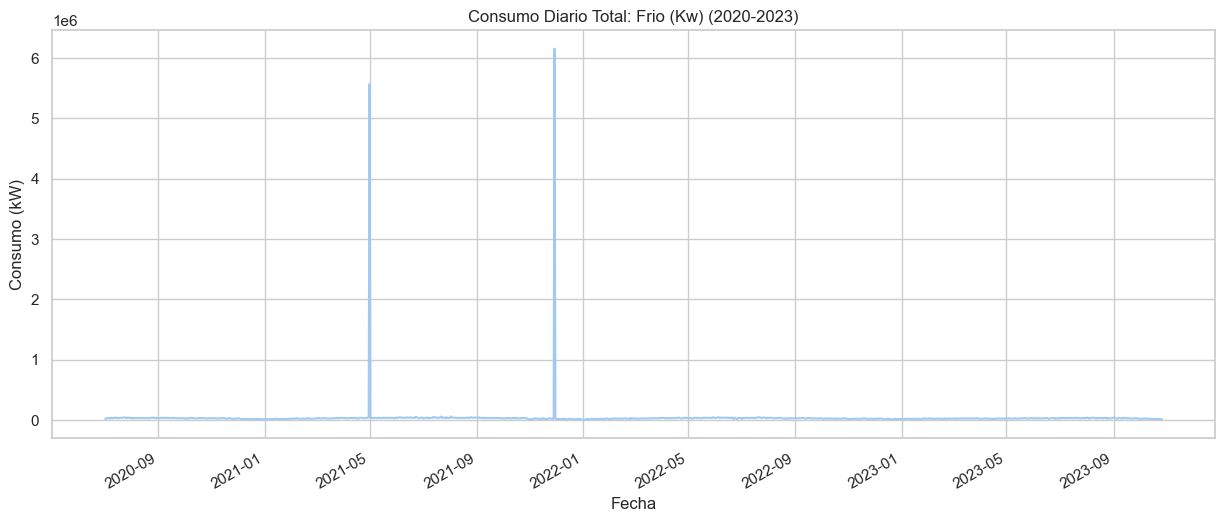

In [61]:
# --- Gráfico de Serie Temporal ---

plt.figure(figsize=(15, 6))
df_daily[TARGET_COL].plot(
    title=f'Consumo Diario Total: {TARGET_COL} (2020-2023)',
    ylabel='Consumo (kW)',
    xlabel='Fecha'
)
plt.show()

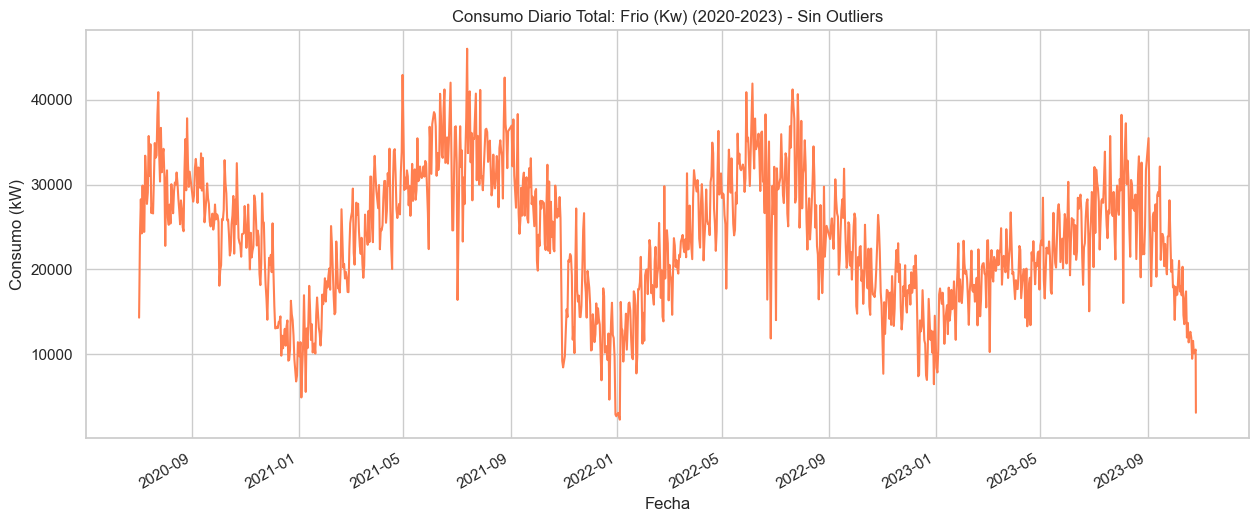

In [62]:
# Quitando outliers para mejor visualización

plt.figure(figsize=(15, 6))
df_eda_temp[TARGET_COL].plot(
    title=f'Consumo Diario Total: {TARGET_COL} (2020-2023) - Sin Outliers',
    ylabel='Consumo (kW)',
    xlabel='Fecha',
    color='coral'
)
plt.show()

Los **picos anómalos** que superan los 80k-100k son evidentes y confirman lo que vimos en el describe().

Se observa un **claro patrón cíclico**, "ondulatorio", donde el consumo sube y baja una vez por año.

### Identificación de patrones estacionales (mensuales y anuales).

2025-11-06 15:48:43,940 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-06 15:48:43,953 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


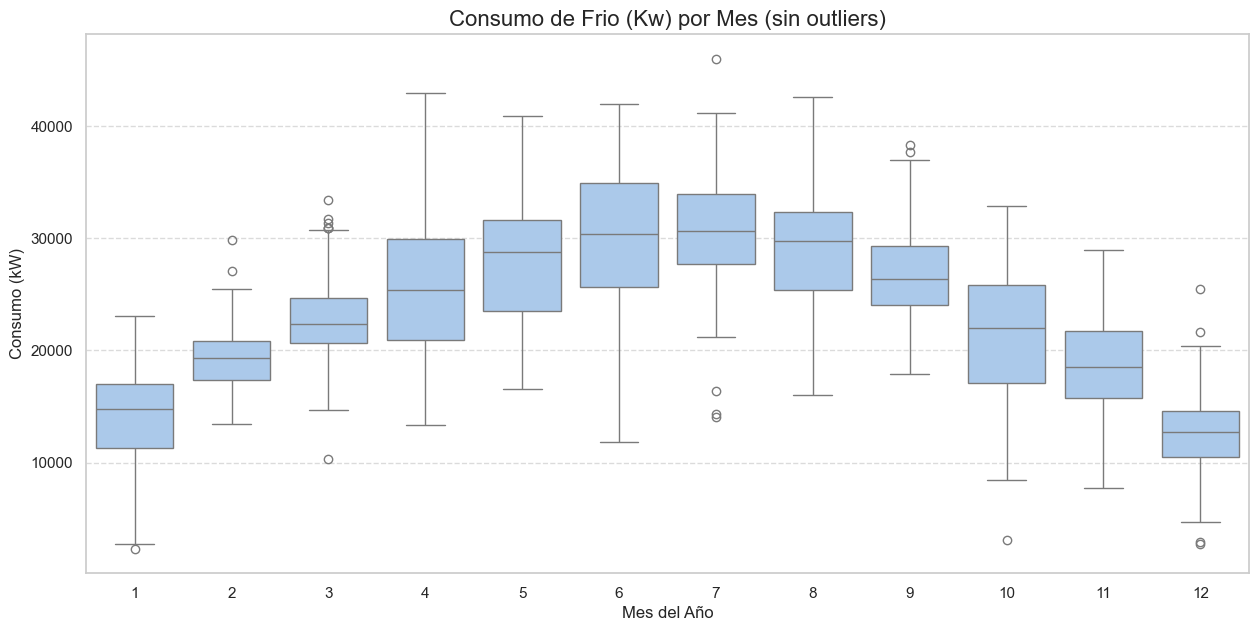

2025-11-06 15:48:44,294 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-06 15:48:44,305 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


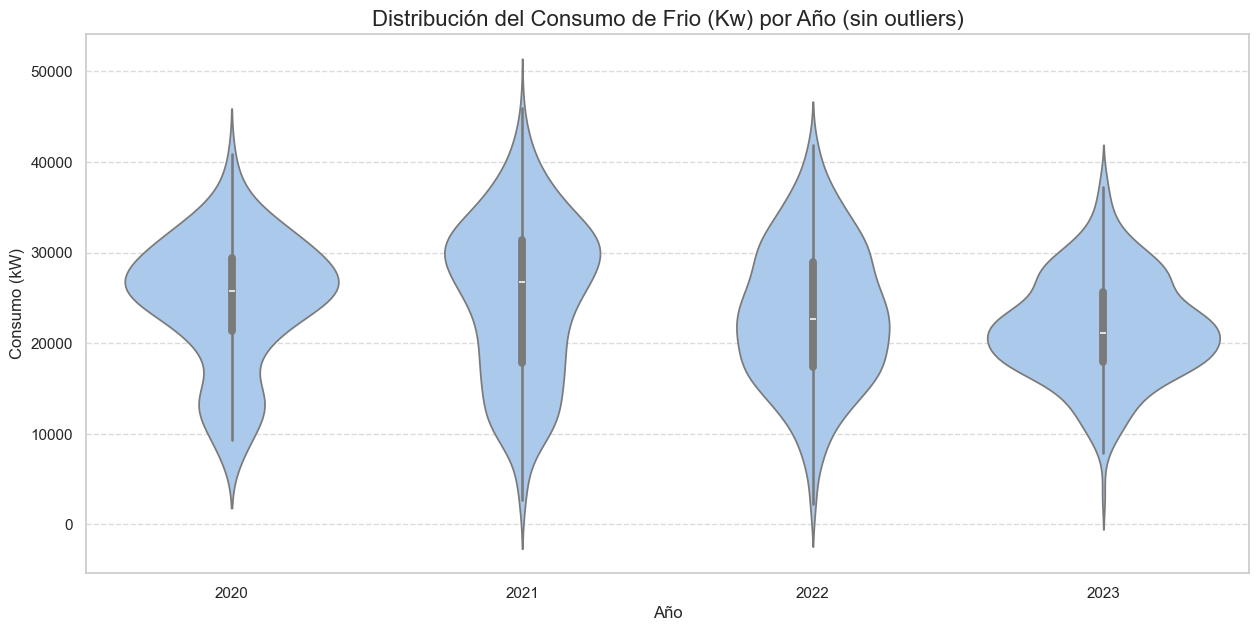

In [63]:
# --- Análisis de Estacionalidad (Mensual y Anual) ---

# Aseguramos que el índice sea de tipo datetime (evita errores de tipo)
df_eda_temp.index = pd.to_datetime(df_eda_temp.index)

# Creamos features temporales usando .to_series().dt para evitar advertencias/errores de tipo
df_eda_temp['mes'] = df_eda_temp.index.to_series().dt.month
df_eda_temp['agno'] = df_eda_temp.index.to_series().dt.year

# --- Boxplot Mensual ---
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_eda_temp, x='mes', y=TARGET_COL)
plt.title(f'Consumo de {TARGET_COL} por Mes (sin outliers)', fontsize=16)
plt.xlabel('Mes del Año')
plt.ylabel('Consumo (kW)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# --- Violinplot Anuales ---
plt.figure(figsize=(15, 7))
sns.violinplot(data=df_eda_temp, x='agno', y=TARGET_COL)
plt.title(f'Distribución del Consumo de {TARGET_COL} por Año (sin outliers)', fontsize=16) 
plt.xlabel('Año')
plt.ylabel('Consumo (kW)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



El boxplot mensual demuestra que la estacionalidad es uno de los *drivers* más fuertes del consumo. Se observa un **aumento significativo** del consumo y su **variabilidad** en los **meses de verano** (Junio-Agosto), y una **clara disminución en invierno** (Diciembre-Febrero). Esto valida la hipótesis de que la refrigeración depende de la temperatura ambiente del lugar.

### Análisis de patrones diarios y semanales.

2025-11-06 15:48:44,607 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-06 15:48:44,620 - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


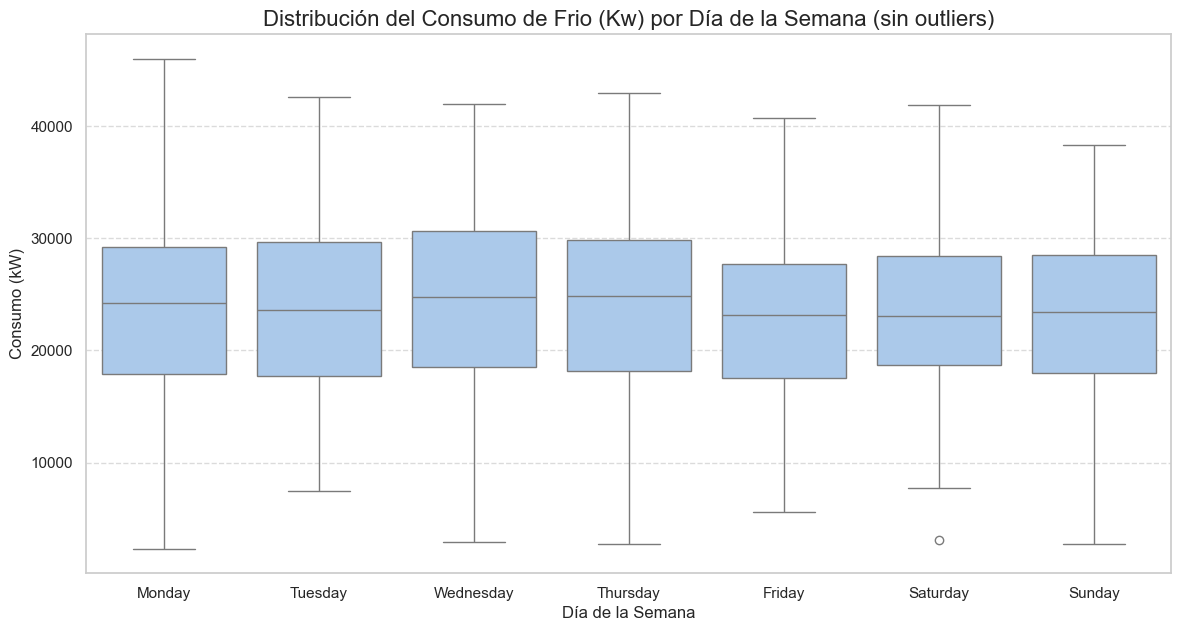

In [64]:
# --- Análisis de Patrón Semanal ---

# Creamos la feature de día de la semana
df_eda_temp['dia_semana'] = df_eda_temp.index.to_series().dt.day_name()

# Definimos el orden correcto de los días
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# --- Boxplot Semanal ---
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_eda_temp, x='dia_semana', y=TARGET_COL, order=orden_dias)
plt.title(f'Distribución del Consumo de {TARGET_COL} por Día de la Semana (sin outliers)', fontsize=16)
plt.xlabel('Día de la Semana')
plt.ylabel('Consumo (kW)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El consumo de refrigeración parece ser un poco más bajo **durante los fines de semana**, lo cual puede ser coherente con la normal reducción de actividad productiva presente en la industria durante esos días.

---

## 4. Análisis de Correlaciones

### Matriz de correlación entre variables numéricas.

In [122]:
# --- Cálculo de la Matriz de Correlación Completa ---

# Calculamos la matriz de correlación (método 'pearson')
corr_matrix_full = df_eda_temp.corr(numeric_only=True)

### Identificación de las 15 variables más correlacionadas con el target.

In [123]:
# 1. Extraemos la serie de correlación solo para nuestro target
corr_target = corr_matrix_full[TARGET_COL]

# 2. Calculamos el valor absoluto para rankear
corr_target_abs = corr_target.abs()

# 3. Ordenamos de mayor a menor
top_features = corr_target_abs.sort_values(ascending=False)

# 4. Seleccionamos las Top 16 (la 1ra es el propio target, Frio (Kw) == 1.0) y luego tomamos las 15 siguientes (índices 1 al 16)
N_TOP_FEATURES = 15
top_15_features_list = top_features.iloc[1:N_TOP_FEATURES + 1].index.tolist()

# También guardamos la serie original (con valores positivos/negativos)
top_15_corr_values = corr_target.loc[top_15_features_list]

features_for_heatmap = [TARGET_COL] + top_15_features_list

print(f"\n--- Top {N_TOP_FEATURES} Features más correlacionadas con {TARGET_COL} ---")
display(top_15_corr_values)


--- Top 15 Features más correlacionadas con Frio (Kw) ---


Servicios (Kw)            0.944807
KW Trafo 10               0.775566
KW Trafo 11               0.747775
Elaboracion (Kw)          0.728354
KW Cond 5. 6 y 9          0.709263
KW Mycom 7                0.652034
Aire Producido (M3)       0.640963
Kw Compresores Aire       0.637448
Hl Producido Bodega       0.637233
Bodega (Kw)               0.615896
Aire (Kw)                 0.612772
KW Trafo 5                0.593360
KW Trafo 9                0.588068
Hl Cerveza Filtrada       0.587758
Totalizador_Filtracion    0.575718
Name: Frio (Kw), dtype: float64

### Visualización mediante heatmaps.

Ahora que tenemos las 15 variables más prometedoras, visualizaremos sus correlaciones *entre ellas* y con el target.

* **Valores Altos vs. Target (1ra columna):** Es lo que buscamos.
* **Valores Altos entre Features (resto de la matriz):** Esto indica **multicolinealidad**. Por ejemplo, si *2 features* tienen una correlación de 0.95, son **redundantes**. Incluir ambas puede desestabilizar modelos lineales (como Ridge/Lasso).

In [127]:
# --- Heatmap de Correlación (Top 15 + Target) ---
import numpy as np
import plotly.graph_objects as go

# Filtramos la matriz de correlación completa para incluir solo nuestro Top 15 + Target
corr_matrix_top15 = corr_matrix_full.loc[features_for_heatmap, features_for_heatmap]

# Heathmap interactivo con plotly
mask = np.tril(np.ones_like(corr_matrix_top15, dtype=bool))  # Máscara para la mitad inferior

fig = go.Figure(data=go.Heatmap(
    x=corr_matrix_top15.index,
    y=corr_matrix_top15.columns,
    z=corr_matrix_top15.mask(mask),
    colorscale='RdBu',
    colorbar=dict(title='Correlación')
))
fig.update_layout(
    title=f'Matriz de Correlación (Top {N_TOP_FEATURES} + {TARGET_COL})',
    xaxis_nticks=36,
    yaxis_nticks=36,
    width=800,
    height=700
)
fig.show()

---

## 5. Análisis de Consumo por Área


En esta sección estudiaremos el consumo energético agregado por las principales áreas de la planta. El objetivo es entender la magnitud de cada área y su relación visual con nuestro target, `Frio (Kw)`.

Según la hoja 'Consolidado EE', las columnas de consumo por área que vamos a analizar son:
* `Elaboracion (Kw)`
* `Envasado (Kw)`
* `Cocina (Kw)`
* `Calderas (Kw)`
* `Servicios (Kw)`
* `Planta (Kw)`

Compararemos estas con `Frio (Kw)`.

In [136]:
# --- Análisis de Consumo por Área ---

# Definimos las columnas de interés
columnas_areas = [
    'Frio (Kw)',
    'Elaboracion (Kw)',
    'Envasado (Kw)',
    'Cocina (Kw)',
    'Calderas (Kw)',
    'Servicios (Kw)',
    'Planta (Kw)'
]

# Quitar outliers de cada variable para mejor visualización
df_eda_temp = df_final.copy()
for col in columnas_areas:
    Q1 = df_eda_temp[col].quantile(0.25)
    Q3 = df_eda_temp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_eda_temp = df_eda_temp[(df_eda_temp[col] >= lower_bound) & (df_eda_temp[col] <= upper_bound)]

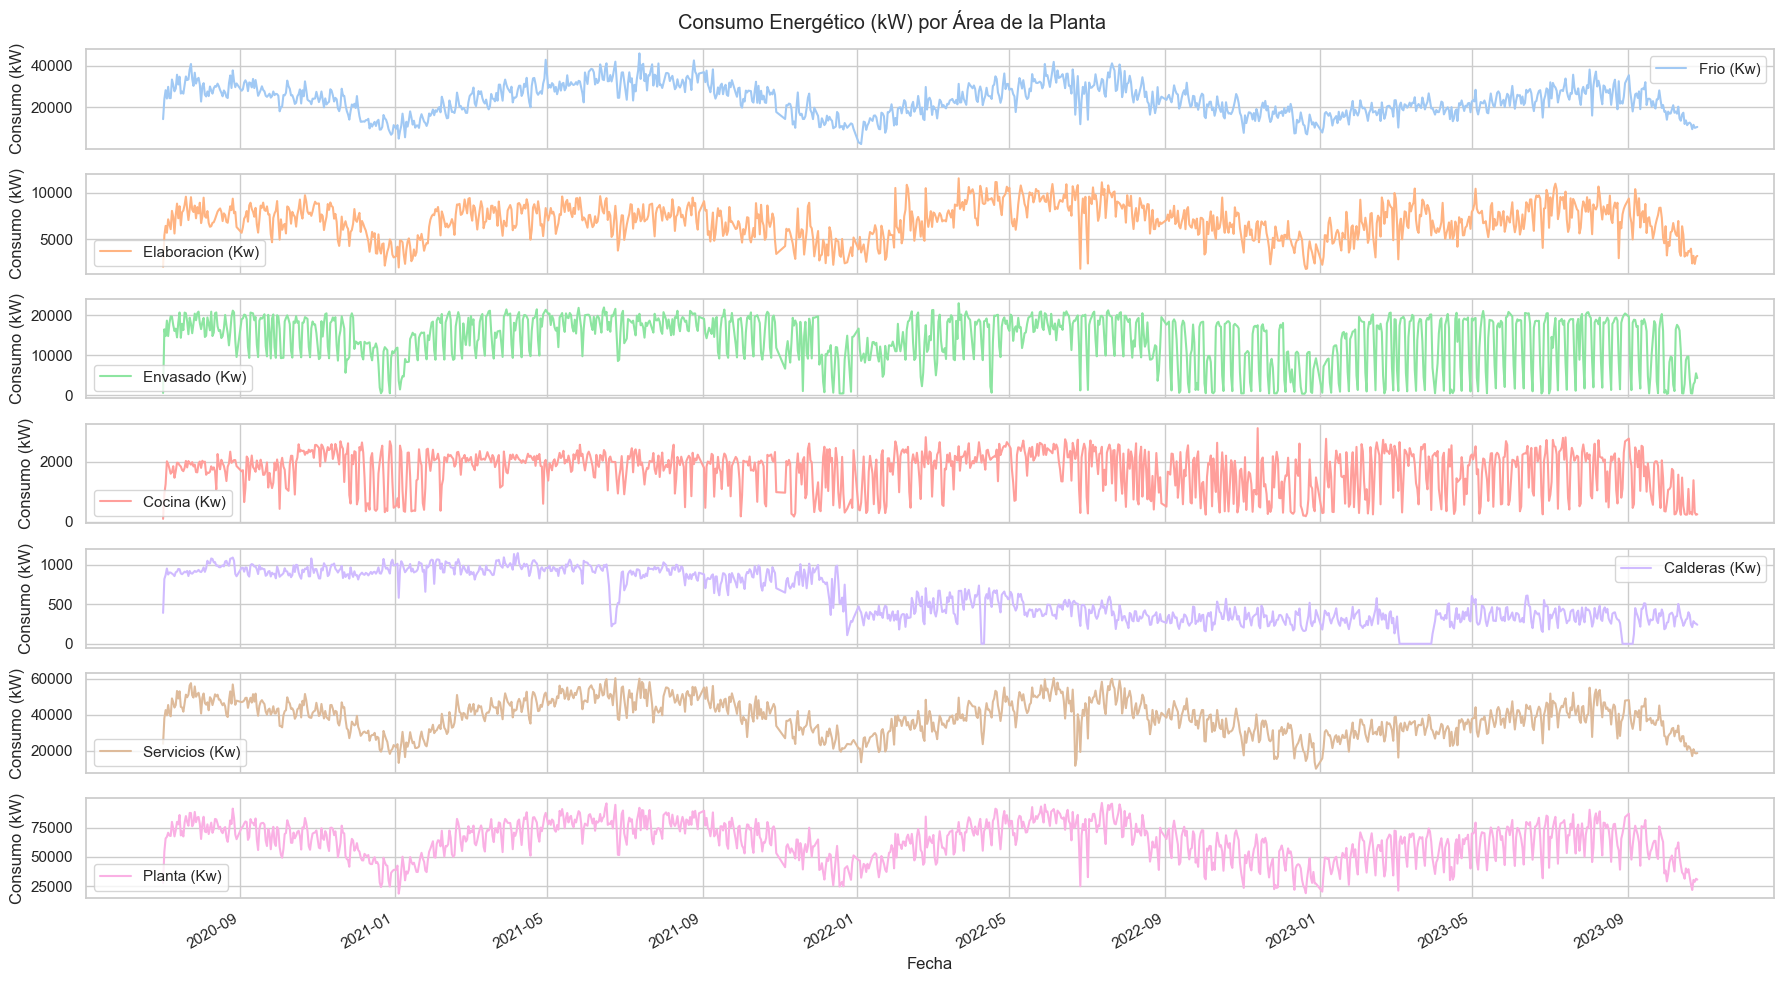

In [137]:
# --- 1. Gráfico de Series Temporales Múltiples ---

# Visualizamos cómo se mueven juntas en el tiempo
df_eda_temp[columnas_areas].plot(
    figsize=(18, 10),
    title='Consumo Energético (kW) por Área de la Planta',
    ylabel='Consumo (kW)',
    xlabel='Fecha',
    subplots=True,  # Grafica cada una por separado (mejor legibilidad)
    layout=(len(columnas_areas), 1), # Una sobre otra
    sharex=True     # Comparten el mismo eje X (Fecha)
)
plt.tight_layout()
plt.show()

El gráfico de series temporales muestra que `Frio (Kw)` y `Servicios (Kw)` siguen un patrón temporal casi idéntico, ambos dominados por la fuerte estacionalidad anual que ya habíamos detectado. 

En cambio, `Elaboracion (Kw)` y `Envasado (Kw)` muestran un comportamiento mucho más "puntiagudo" (spiky), probablemente ligado a los ciclos de producción diarios/semanales más que a la estación del año.

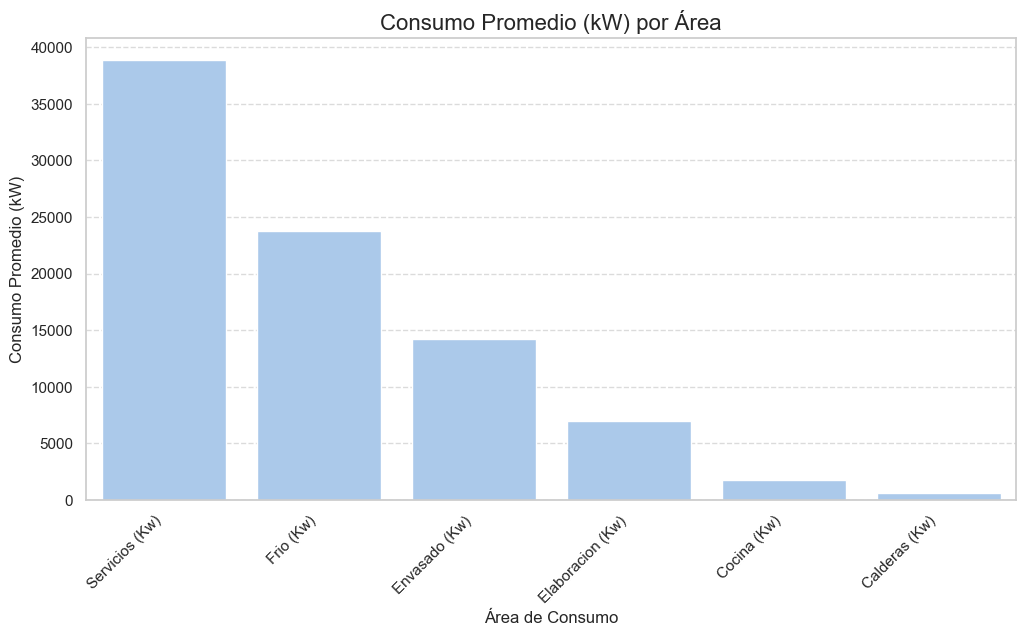

In [138]:
# --- 2. Análisis de Contribución Promedio (Bar Plot) ---

# Calculamos el consumo promedio de cada área para ver su "peso"
cols_partes = [col for col in columnas_areas if col != 'Planta (Kw)']
    
# Aplicamos to_numeric por columna (Series) para evitar ambigüedad de tipos
consumo_promedio = df_eda_temp[cols_partes].apply(lambda s: pd.to_numeric(s, errors='coerce')).mean()
consumo_promedio = consumo_promedio.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=consumo_promedio.index,
    y=consumo_promedio.values
)
plt.title('Consumo Promedio (kW) por Área', fontsize=16)
plt.ylabel('Consumo Promedio (kW)')
plt.xlabel('Área de Consumo')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El gráfico cuantifica la magnitud de cada área. Confirma que `Frio (Kw)` y `Servicios (Kw)` son, **por lejos**, los dos *mayores consumidores de energía* de la planta.